In [1]:
import json
import numpy as np
import pandas as pd
import datetime
import os
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

/Users/nickhoernle/anaconda2/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
columns = ['topic1', 'topic2', 'topic3', 'time']

data_df = pd.DataFrame(columns=columns)
data_df.index.name = 'respondent'
data_df

,topic1,topic2,topic3,time
respondent,,,,


In [3]:
data_path = './../responses/'
# Deal with question 1

i = 0
for index, file_ in enumerate(os.listdir(data_path)):
    
    if ('second_stage_' in file_):
       
        json_data=open(os.path.join(data_path, file_)).read()
        data = json.loads(json_data)

        for selection in data['choices']:
                        
            data_df.set_value(i, selection['question'].replace(' ', '').lower(), int(selection['selected_id']))
        
        data_df.set_value(i, 'time', datetime.datetime.fromtimestamp(data['time']/1000))
        i += 1

data_df

,topic1,topic2,topic3,time
respondent,,,,
0,2,3,2,2017-05-02 09:30:17
1,3,3,3,2017-05-02 09:41:22
2,2,2,3,2017-05-02 09:41:36
3,3,3,3,2017-05-02 10:41:57
4,2,1,3,2017-05-02 12:29:10
5,3,3,3,2017-05-02 13:21:30
6,3,1,1,2017-05-02 14:22:47
7,1,3,1,2017-05-02 14:23:08
8,2,2,1,2017-05-02 14:23:37


In [4]:
vals = [data_df['topic{}'.format(i)].values for i in range(1,4)]

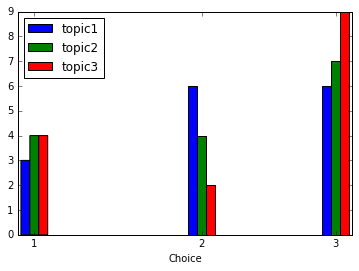

In [5]:
plt.hist(vals, label=['topic1', 'topic2', 'topic3'])
plt.legend(loc='best')
plt.xticks([1.1,2.1,2.9], [1,2,3])
plt.xlabel('Choice')
plt.show()